# Chapter 4.2: Elastic Procrustes Fits and Outliers

In [1]:
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)
library(elasticproc2d)

In [2]:
library(dplyr)
library(viridis)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Settings.

In [3]:
theme_thesis <- function(){ 
    theme_bw() %+replace%    #replace elements we want to change
    theme()
}

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)

#### Load datasets
1. Spirals + Random Rotation / Scaling / Translation
2. Digits3 + Random Rotation / Scaling / Translation

In [4]:
source("../scripts/load_datasets.R")

In [5]:
set.seed(18)
spirals.eucl <- curves.spiral(n_curves = 10, rotate=TRUE, scale=TRUE, center=FALSE, translate=TRUE)
set.seed(18)
digits3.eucl <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE, translate=TRUE)

#### Parameters

In [6]:
knots.spirals <- seq(0,1,length=19)
knots.digits3 <- seq(0,1,length=13)
type = "smooth"
penalty <- 2

#### Mean Estimation

In [7]:
mean.spirals <- compute_elastic_proc2d_mean(spirals.eucl, knots = knots.spirals, type = type, penalty = penalty)
mean.digits3 <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots.digits3, type = type, penalty = penalty)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

#### Get elastic full Procrustes fits.

In [17]:
efpfit.spirals <- lapply(seq_along(mean.spirals$data_curves), function(j){
    curve <- get_procrustes_fit(mean.spirals$data_curves[[j]])
    curve <- center_curve(curve)
    curve$t <- mean.spirals$data_curves[[j]]$t_optim
    curve
})

efpfit.digits3 <- lapply(seq_along(mean.digits3$data_curves), function(j){
    curve <- get_procrustes_fit(mean.digits3$data_curves[[j]])
    curve <- center_curve(curve)
    curve$t <- mean.digits3$data_curves[[j]]$t_optim
    curve
})

## Fig. 4.3: Elastic Procrustes Fits

In [13]:
palette <- brewer.pal(6, "Paired")

In [202]:
p.spirals <- ggplot() + 
    geom_path(data=get_evals(mean.spirals), aes(x=X1, y=X2), size=1, color=palette[6]) +
    geom_path(data=bind_rows(efpfit.spirals, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(efpfit.spirals, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.15,0.15), ylim=c(-0.15,0.15)) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

p.digits3 <- ggplot() + 
    geom_path(data=get_evals(mean.digits3), aes(x=X1, y=X2), size=1, color=palette[6]) +
    geom_path(data=bind_rows(efpfit.digits3, .id="id"), size=0.5, alpha=0.3, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(efpfit.digits3, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.25,0.20), ylim=c(-0.25,0.20)) +
    theme(aspect.ratio = 1) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

png 
  2

png 
  2

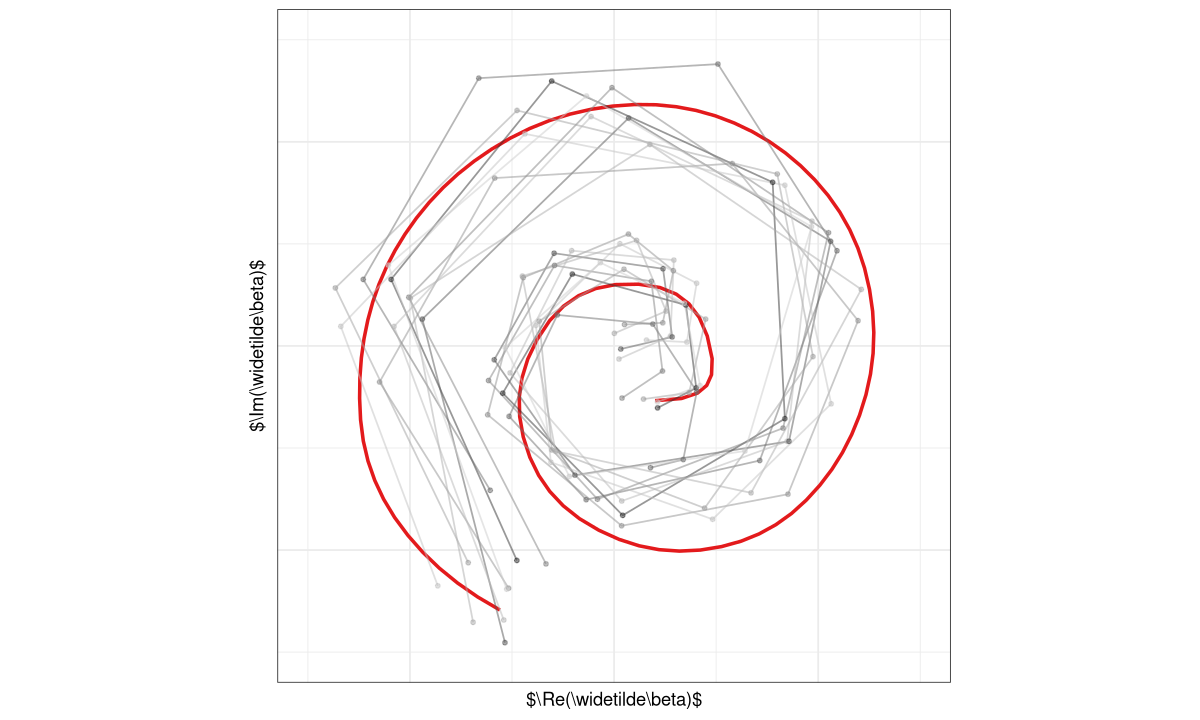

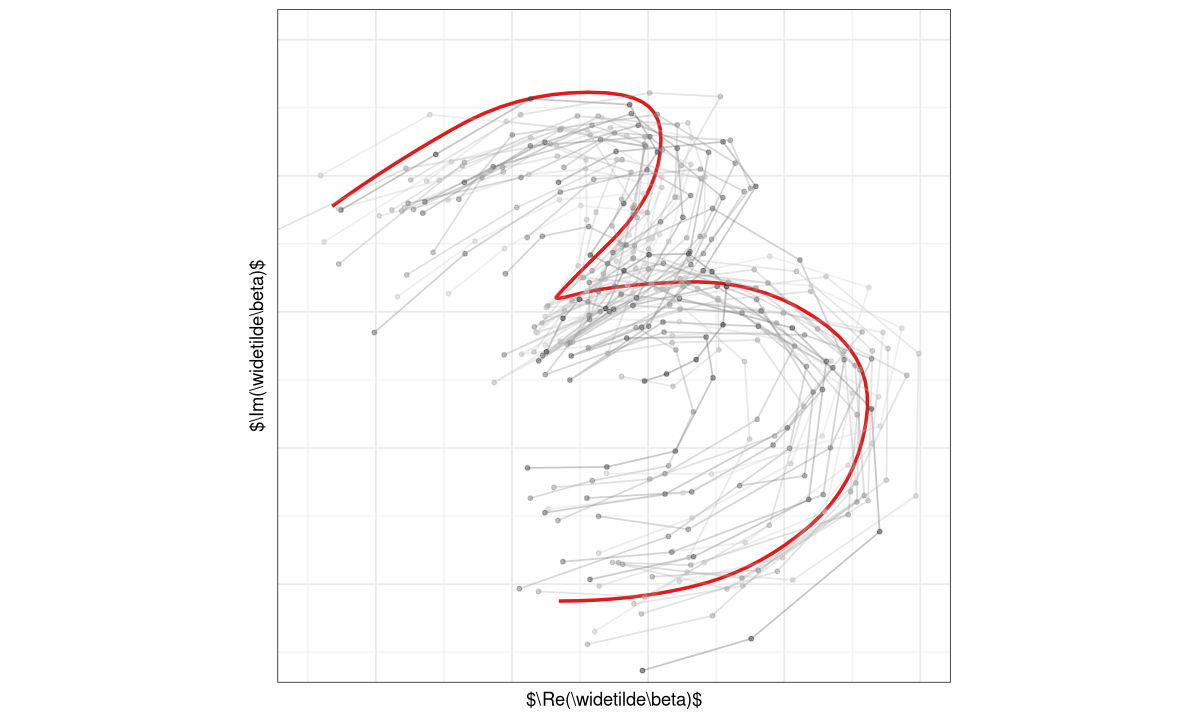

In [203]:
fname = "../tex/graphics/4-spirals-pfits.tex"
tikzDevice::tikz(file = fname, width = 2.5, height = 2.5)
p.spirals
dev.off()
p.spirals
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/4-digits3-pfits.tex"
tikzDevice::tikz(file = fname, width = 2.5, height = 2.5)
p.digits3
dev.off()
p.digits3
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

## Fig. 4.4: SRV elastic Procrustes fits

In [16]:
efpfit.srv.spirals <- lapply(seq_along(mean.spirals$data_curves), function(j){
    curve <- get_procrustes_fit(mean.spirals$data_curves[[j]])
    curve$t <- mean.spirals$data_curves[[j]]$t_optim
    curve$t_optim <- NULL
    elasdics::get_srv_from_points(curve)
})

efpfit.srv.digits3 <- lapply(seq_along(mean.digits3$data_curves), function(j){
    curve <- get_procrustes_fit(mean.digits3$data_curves[[j]])
    curve$t <- mean.digits3$data_curves[[j]]$t_optim
    curve$t_optim <- NULL
    elasdics::get_srv_from_points(curve)
})

In [205]:
p.srv.spirals <- ggplot() + 
    geom_path(data=get_evals(mean.spirals, srv=TRUE), aes(x=X1, y=X2), size=1, color=palette[6]) +
    geom_path(data=bind_rows(efpfit.srv.spirals, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(efpfit.srv.spirals, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    scale_color_grey() +
    coord_fixed(xlim=c(-1.05,1.05), ylim=c(-1.05,1.05)) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

p.srv.digits3 <- ggplot() + 
    geom_path(data=get_evals(mean.digits3, srv=TRUE), aes(x=X1, y=X2), size=1, color=palette[6]) +
    geom_path(data=bind_rows(efpfit.srv.digits3, .id="id"), size=0.5, alpha=0.3, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(efpfit.srv.digits3, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    scale_color_grey() +
    coord_fixed(xlim=c(-1.25,1.25), ylim=c(-1.25,1.25)) +
    theme(aspect.ratio = 1) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

png 
  2

png 
  2

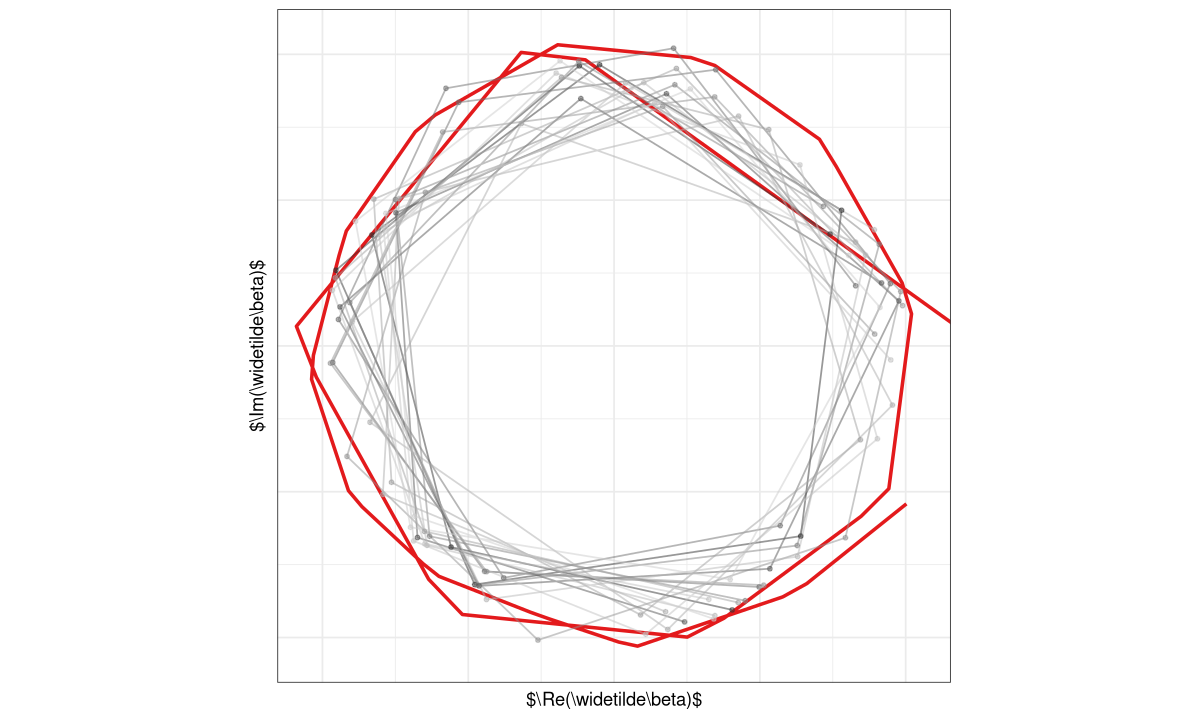

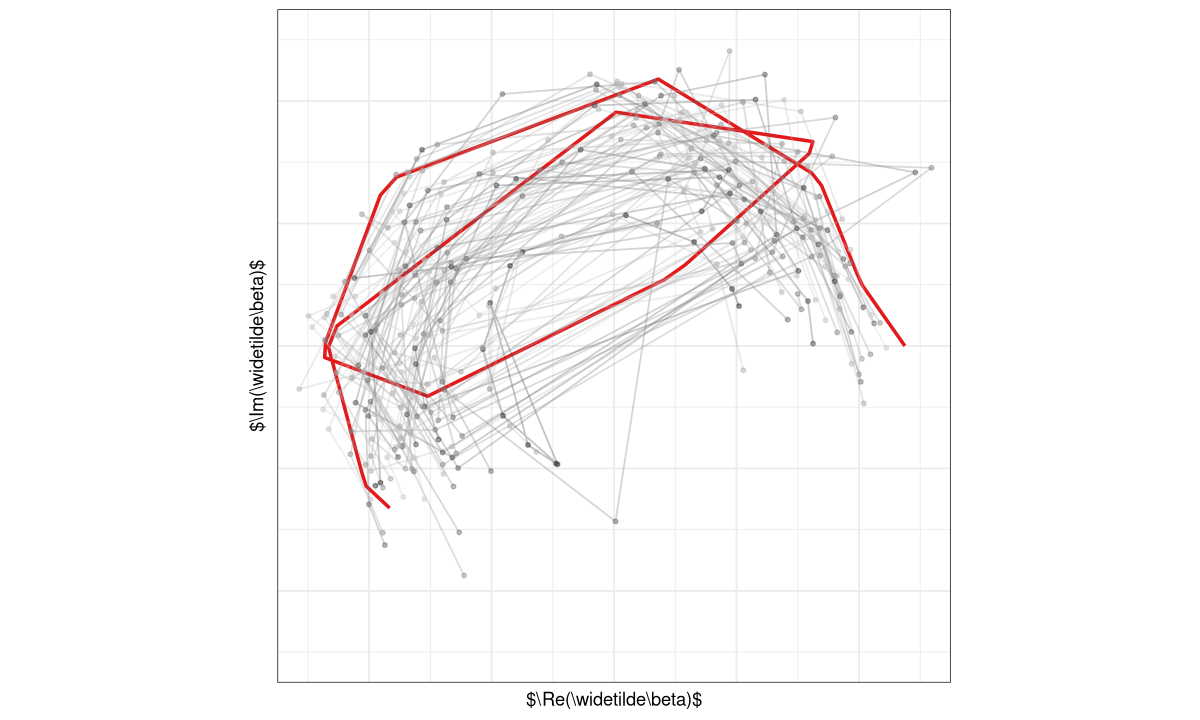

In [206]:
fname = "../tex/graphics/4-spirals-pfits-srv.tex"
tikzDevice::tikz(file = fname, width = 2.5, height = 2.5)
p.srv.spirals
dev.off()
p.srv.spirals
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/4-digits3-pfits-srv.tex"
tikzDevice::tikz(file = fname, width = 2.5, height = 2.5)
p.srv.digits3
dev.off()
p.srv.digits3
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

## Fig. 4.4: Outlier elastic Prorustes fits

In [8]:
dists.spirals <- sapply(mean.spirals$data_curves, function(curve){
    attr(curve, "dist_to_mean")
})
dists.digits3 <- sapply(mean.digits3$data_curves, function(curve){
    attr(curve, "dist_to_mean")
})
bopts.spirals <- sapply(seq_along(mean.spirals$data_curves), function(j){
    mean.spirals$fit$b_optims[[j]]
})
bopts.digits3 <- sapply(seq_along(mean.digits3$data_curves), function(j){
    mean.digits3$fit$b_optims[[j]]
})

In [9]:
df.s <- data.frame("dist" = dists.spirals, "bopt" = bopts.spirals, "data" = "Spirals")
df.d <- data.frame("dist" = dists.digits3, "bopt" = bopts.digits3, "data" = "Digits3")
df <- bind_rows(df.s, df.d) %>% pivot_longer(c("bopt", "dist"), names_to = "var")

png 
  2

png 
  2

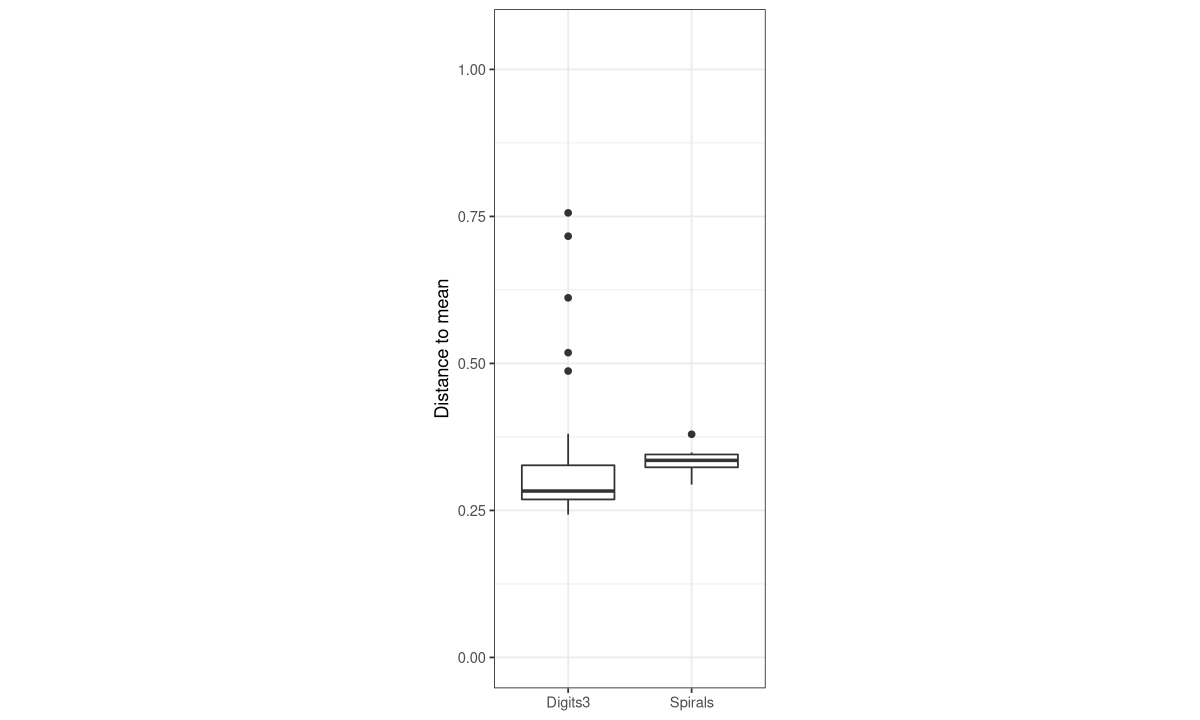

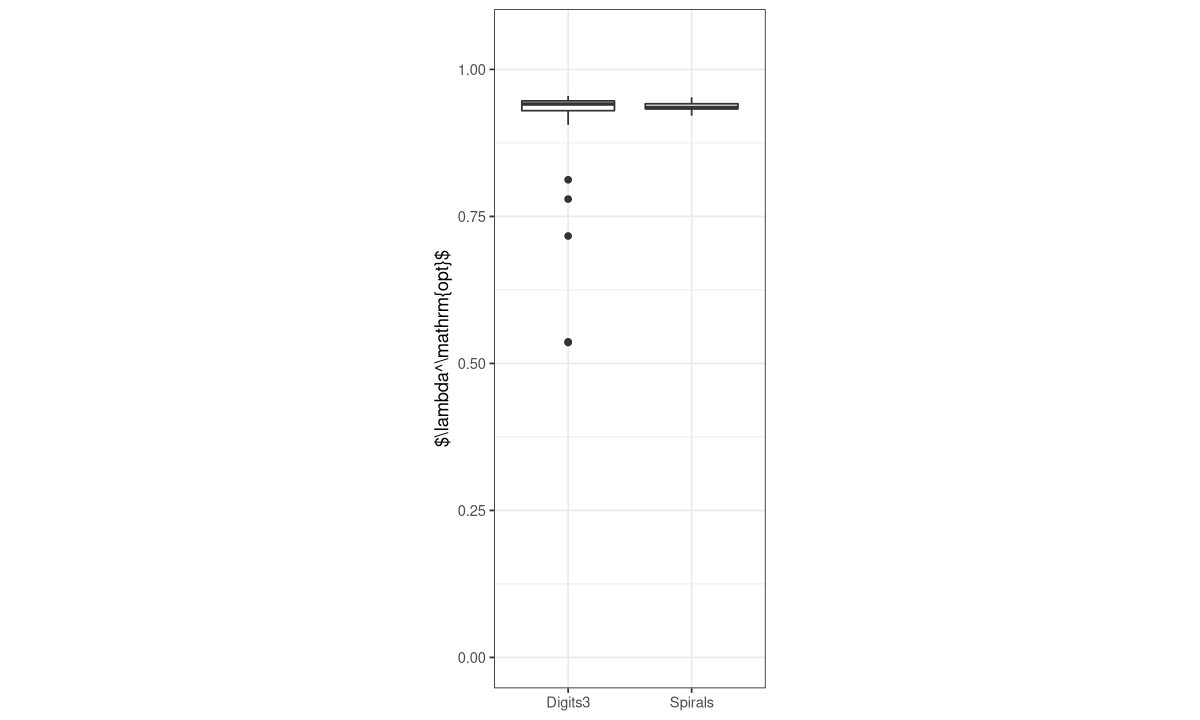

In [10]:
p.bp.dist <- ggplot(df %>% filter(var=="dist")) + 
    geom_boxplot(aes(y=value, x=data), show.legend=FALSE) +
    coord_fixed(ylim=c(0,1.05)) +
    labs(y = "Distance to mean") +
    theme_thesis() +
    theme(axis.title.x=element_blank(), aspect.ratio = 2.5)

p.bp.bopt <- ggplot(df %>% filter(var=="bopt")) + 
    geom_boxplot(aes(y=value, x=data), show.legend=FALSE) +
    coord_fixed(ylim=c(0,1.05)) +
    labs(y = "$\\lambda^\\mathrm{opt}$") +
    theme_thesis() +
    theme(axis.title.x=element_blank(), aspect.ratio = 2.5)

fname = "../tex/graphics/4-outlier-dist.tex"
tikzDevice::tikz(file = fname, width = 1.5, height = 3)
p.bp.dist
dev.off()
p.bp.dist
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/4-outlier-bopt.tex"
tikzDevice::tikz(file = fname, width = 1.5, height = 3)
p.bp.bopt
dev.off()
p.bp.bopt
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

In [19]:
outliers.d <- boxplot(dists.digits3, plot=FALSE)$out
outliers.d <- sort(outliers.d)[-1]
out.digits3 <- efpfit.digits3[which(dists.digits3 %in% outliers.d)]

png 
  2

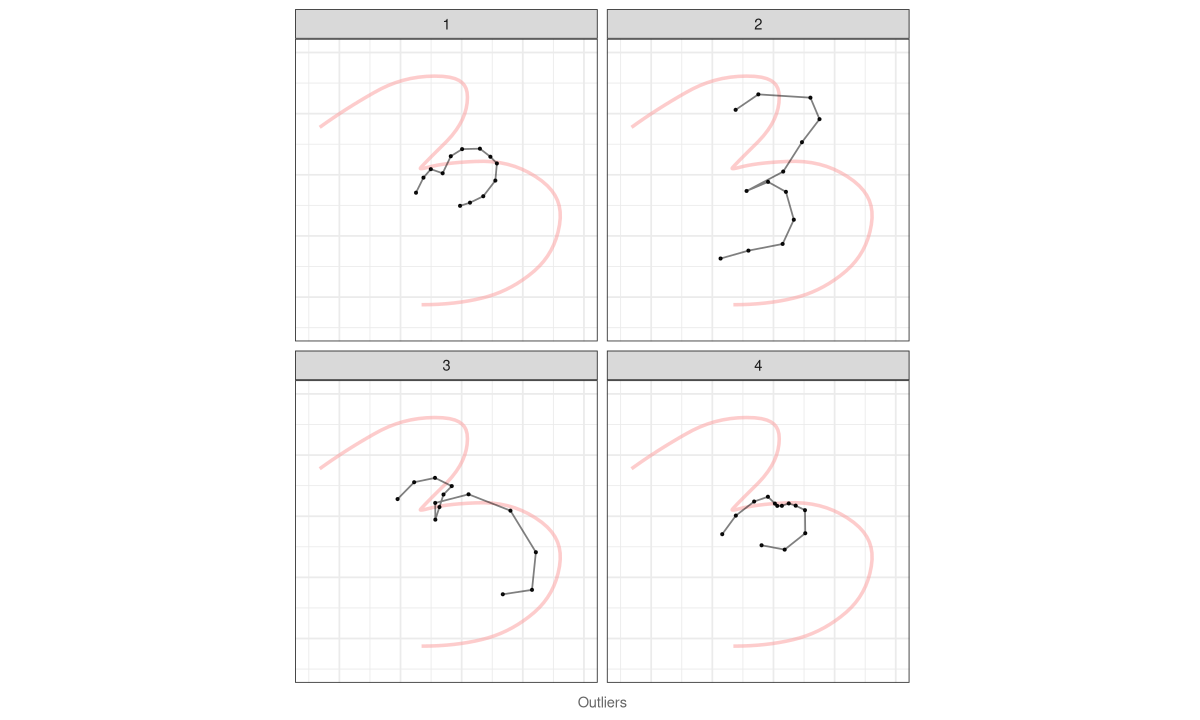

In [20]:
p.outliers <- ggplot() + 
    geom_path(data=get_evals(mean.digits3), aes(x=X1, y=X2), size=1, color=palette[5], alpha=0.5) +
    geom_path(data=bind_rows(out.digits3, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2), show.legend=FALSE) +
    geom_point(data=bind_rows(out.digits3, .id="id"), size=0.5, alpha=0.9, aes(x=X1, y=X2), show.legend=FALSE) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.25,0.20), ylim=c(-0.25,0.20)) +
    labs(caption="Outliers") +
    theme(aspect.ratio = 1) +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank(),
          axis.title.x = element_blank(), axis.title.y = element_blank()) +
    theme(plot.caption = element_text(colour="grey40", size=rel(0.8), hjust=0.5)) +
    facet_wrap(~ id, nrow=2)

fname = "../tex/graphics/4-outlier.tex"
tikzDevice::tikz(file = fname, width = 2, height = 2.8)
p.outliers
dev.off()
p.outliers
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)